#                                           Baseball Case Study

Project Description
This dataset utilizes data from 2014 Major League Baseball seasons in order to develop an algorithm that predicts the number of wins for a given team in the 2015 season based on several different indicators of success. There are 16 different features that will be used as the inputs to the machine learning and the output will be a value that represents the number of wins. 

Input features
W - This indicates the number of Wins credited to a pitcher: number of games where pitcher was pitching while their team took the lead and went on to win, also the starter needs to pitch at least 5 innings of work.

R - This indicates Runs scored. A run is scored when a player advances around first, second and third base and returns safely to home plate, touching the bases in that order, before three outs are recorded and all obligations to reach base safely on batted balls are met or assured: number of times a player crosses home plate.

AB - This means At bat or time at bat. It's batter's turn batting against a pitcher, plate appearances, not including bases on balls, being hit by pitch, sacrifices, interference, or obstruction.

H - This means Hit. It's also called a "base hit", is credited to a batter when the batter safely reaches or passes first base after hitting the ball into fair territory, without the benefit of either an error or a fielder's choice: reaching base because of a batted, fair ball without error by the defense.

2B - This means the act of a batter striking the pitched ball and safely reaching second base without being called out by the umpire, without the benefit of a fielder's misplay (see error) or another runner being put out on a fielder's choice. A double is a type of hit (the others being the single, triple and home run) and is sometimes called a "two-bagger" or "two-base hit": hits on which the batter reaches second base safely without the contribution of a fielding error.

3B - This means a Triple.It's the act of a batter safely reaching third base after hitting the ball, with neither the benefit of a fielder's misplay nor another runner being put out on a fielder's choice. A triple is sometimes called a "three-bagger" or "three-base hit": hits on which the batter reaches third base safely without the contribution of a fielding error.

HR - This means Home runs. It's scored when the ball is hit in such a way that the batter is able to circle the bases and reach home plate safely in one play without any errors being committed by the defensive team. A home run is usually achieved by hitting the ball over the outfield fence between the foul poles (or hitting either foul pole) without the ball touching the field: hits on which the batter successfully touched all four bases, without the contribution of a fielding error.

BB - This means Base on balls (also called a "walk"). It occurs in baseball when a batter receives four pitches that the umpire calls balls, and is in turn awarded first base without the possibility of being called out: hitter not swinging at four pitches called out of the strike zone and awarded first base.

SO - Also denoted as "K" means Strikeout. It occurs when a batter accumulates three strikes during a time at bat. It usually means that the batter is out: number of batters who received strike three.

SB - This means Stolen base. It occurs when a runner advances to a base to which they are not entitled and the official scorer rules that the advance should be credited to the action of the runner: number of bases advanced by the runner while the ball is in the possession of the defense.

RA - This means Run Average. It refer to measures of the rate at which runs are allowed or scored.

ER - This means Earned run. It refers to any run that was fully enabled by the offensive team's production in the face of competent play from the defensive team: number of runs that did not occur as a result of errors or passed balls.

ERA - This means Earned Run Average. It refers to the average of earned runs allowed by a pitcher per nine innings pitched (i.e. the traditional length of a game). It is determined by dividing the number of earned runs allowed by the number of innings pitched and multiplying by nine: total number of earned runs (see "ER" above), multiplied by 9, divided by innings pitched.

CG - This means Complete Game. It's the act of a pitcher pitching an entire game without the benefit of a relief pitcher. A pitcher who meets this criterion will be credited with a complete game regardless of the number of innings played: number of games where player was the only pitcher for their team.

SHO - This means Shutout. It refers to the act by which a single pitcher pitches a complete game and does not allow the opposing team to score a run: number of complete games pitched with no runs allowed.

SV - This means Save. It's credited to a pitcher who finishes a game for the winning team under certain prescribed circumstances: number of games where the pitcher enters a game led by the pitcher's team, finishes the game without surrendering the lead, is not the winning pitcher, and either (a) the lead was three runs or fewer when the pitcher entered the game; (b) the potential tying run was on base, at bat, or on deck; or (c) the pitcher pitched three or more innings.

E - This means Errors. It's an act, in the judgment of the official scorer, of a fielder misplaying a ball in a manner that allows a batter or baserunner to advance one or more bases or allows a plate appearance to continue after the batter should have been put out. The term error is sometimes used to refer to the play during which an error was committed: number of times a fielder fails to make a play he should have made with common effort, and the offense benefits as a result.

Output: Number of predicted wins (W)
To understand the columns meaning, follow the link given below to understand the baseball statistics: https://en.wikipedia.org/wiki/Baseball_statistics

Dataset Link
For downloading the dataset, use the link given below. 
•	https://github.com/dsrscientist/Data-Science-ML-Capstone-Projects/blob/master/baseball.csv 




In [12]:
#Import the necessary libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

from sklearn.preprocessing import PowerTransformer
from sklearn.preprocessing import StandardScaler
from statsmodels.stats.outliers_influence import variance_inflation_factor

from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score

from sklearn.linear_model import LinearRegression
from sklearn.linear_model import LinearRegression, Lasso,Ridge
from sklearn.ensemble import RandomForestRegressor, AdaBoostRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.neighbors import KNeighborsRegressor as KNN
from sklearn.svm import SVR
from sklearn.linear_model import SGDRegressor
from sklearn.metrics import classification_report
from sklearn.model_selection import cross_val_score

from sklearn.model_selection import GridSearchCV

from sklearn import metrics
import scipy as stats
%matplotlib inline

In [2]:
#Dataset Retrieval
url="https://raw.githubusercontent.com/dsrscientist/Data-Science-ML-Capstone-Projects/master/baseball.csv"
df = pd.read_csv(url)
df.head()

,W,R,AB,H,2B,3B,HR,BB,SO,SB,RA,ER,ERA,CG,SHO,SV,E
0,95,724,5575,1497,300,42,139,383,973,104,641,601,3.73,2,8,56,88
1,83,696,5467,1349,277,44,156,439,1264,70,700,653,4.07,2,12,45,86
2,81,669,5439,1395,303,29,141,533,1157,86,640,584,3.67,11,10,38,79
3,76,622,5533,1381,260,27,136,404,1231,68,701,643,3.98,7,9,37,101
4,74,689,5605,1515,289,49,151,455,1259,83,803,746,4.64,7,12,35,86


In [4]:
#Exploratory Data Analysis
#Checking the dimension of the dataset
df.shape


(30, 17)

In [5]:
#Dataset has 30 rows and 17 columns out of which "W" is the target variable and rest 16 are independent variable.
print(f"The rows and columns in the dataset: {df.shape}")
print(f"\nThe column headers in the dataset: {df.columns}")

The rows and columns in the dataset: (30, 17)

The column headers in the dataset: Index(['W', 'R', 'AB', 'H', '2B', '3B', 'HR', 'BB', 'SO', 'SB', 'RA', 'ER',
       'ERA', 'CG', 'SHO', 'SV', 'E'],
      dtype='object')


In [7]:
#Checking the datatypes of the columns
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30 entries, 0 to 29
Data columns (total 17 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   W       30 non-null     int64  
 1   R       30 non-null     int64  
 2   AB      30 non-null     int64  
 3   H       30 non-null     int64  
 4   2B      30 non-null     int64  
 5   3B      30 non-null     int64  
 6   HR      30 non-null     int64  
 7   BB      30 non-null     int64  
 8   SO      30 non-null     int64  
 9   SB      30 non-null     int64  
 10  RA      30 non-null     int64  
 11  ER      30 non-null     int64  
 12  ERA     30 non-null     float64
 13  CG      30 non-null     int64  
 14  SHO     30 non-null     int64  
 15  SV      30 non-null     int64  
 16  E       30 non-null     int64  
dtypes: float64(1), int64(16)
memory usage: 4.1 KB


There are mainly 16 integer datatypes and only ERA is float datatype.
There are no null values present.

In [8]:
#Missing values inspection
df.isnull().sum()

W      0
R      0
AB     0
H      0
2B     0
3B     0
HR     0
BB     0
SO     0
SB     0
RA     0
ER     0
ERA    0
CG     0
SHO    0
SV     0
E      0
dtype: int64

In [9]:
#Feature Analysis
#Unique value review in each feature and in the target
df.nunique()

W      24
R      28
AB     29
H      29
2B     22
3B     23
HR     27
BB     29
SO     29
SB     27
RA     30
ER     30
ERA    30
CG      9
SHO    12
SV     20
E      21
dtype: int64

About the number of unique values:

The target variable W has 24 unique values of 30 total in the dataset, so we need to build a regression model to address this project.
The majority of columns have almost the same unique values as the rows in the dataset despite being integers.
The columns CG and SHO have limited unique values, 9 and 12 respectively.


In [10]:
#Summary of statistics of the dataset
df.describe()


,W,R,AB,H,2B,3B,HR,BB,SO,SB,RA,ER,ERA,CG,SHO,SV,E
count,30.000000,30.000000,30.000000,30.000000,30.000000,30.000000,30.000000,30.000000,30.00000,30.000000,30.000000,30.000000,30.000000,30.000000,30.000000,30.000000,30.000000
mean,80.966667,688.233333,5516.266667,1403.533333,274.733333,31.300000,163.633333,469.100000,1248.20000,83.500000,688.233333,635.833333,3.956333,3.466667,11.300000,43.066667,94.333333
std,10.453455,58.761754,70.467372,57.140923,18.095405,10.452355,31.823309,57.053725,103.75947,22.815225,72.108005,70.140786,0.454089,2.763473,4.120177,7.869335,13.958889
min,63.000000,573.000000,5385.000000,1324.000000,236.000000,13.000000,100.000000,375.000000,973.00000,44.000000,525.000000,478.000000,2.940000,0.000000,4.000000,28.000000,75.000000
25%,74.000000,651.250000,5464.000000,1363.000000,262.250000,23.000000,140.250000,428.250000,1157.50000,69.000000,636.250000,587.250000,3.682500,1.000000,9.000000,37.250000,86.000000
50%,81.000000,689.000000,5510.000000,1382.500000,275.500000,31.000000,158.500000,473.000000,1261.50000,83.500000,695.500000,644.500000,4.025000,3.000000,12.000000,42.000000,91.000000
75%,87.750000,718.250000,5570.000000,1451.500000,288.750000,39.000000,177.000000,501.250000,1311.50000,96.500000,732.500000,679.250000,4.220000,5.750000,13.000000,46.750000,96.750000
max,100.000000,891.000000,5649.000000,1515.000000,308.000000,49.000000,232.000000,570.000000,1518.00000,134.000000,844.000000,799.000000,5.040000,11.000000,21.000000,62.000000,126.000000


Observations from the summary of the statistics

1.The summary of the dataset looks perfect since there are no negative/invalid values present.
2.The counts of all the columns are the same which means there are no missing values in the dataset.
3.The dependent variable W is numerical.
4.The mean value is larger than the median in columns H, AB, HR, E, SV, 3B, which means the data is skewed to the right in these columns.
5.In the column SB the median and the mean are the same.
6.The data in the columns W, ERA, R, 2B, BB, RA, ER, SO have a difference between the mean value less than the median which means the data is skewed to the left.
7.The dataset could present outliers in the columns R, SO, ER, RA, SB, HR, E, SV, however in the univariate analysis of each feature we will verify it.
8.The features are not on the same scale. AB has a mean of 5516.26 while ERA has a mean value of 3.96. Features should be on the same scale for algorithms.

So from these observations we can conclude that the outliers present in many of these columns. We will remove these outliers using some methods later.

In [11]:
#Duplicate Search
df[df.duplicated()].shape

(0, 17)

There are no duplicate values in the dataset


<Axes: >

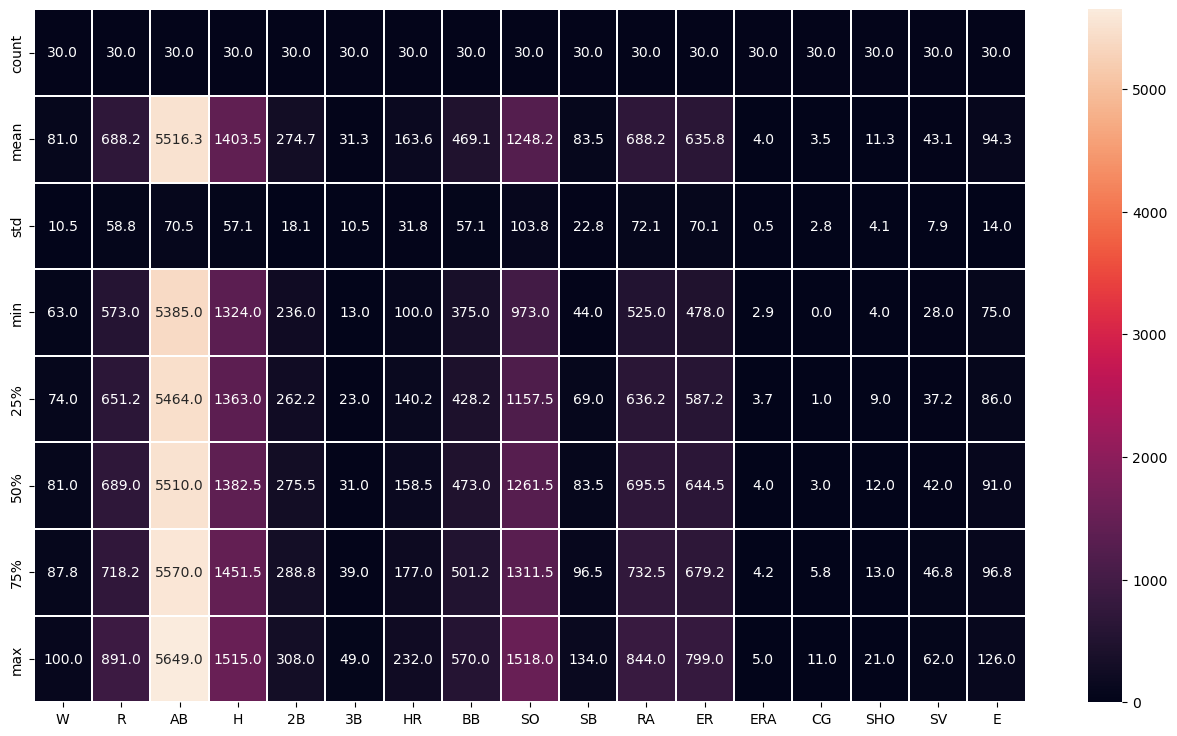

In [13]:
#Data Visualisation 
# Visualizing the statistics of the columns using Heatmap
plt.figure(figsize=(16,9))
sns.heatmap(df.describe(),linewidths=0.1,fmt='0.1f',annot=True)

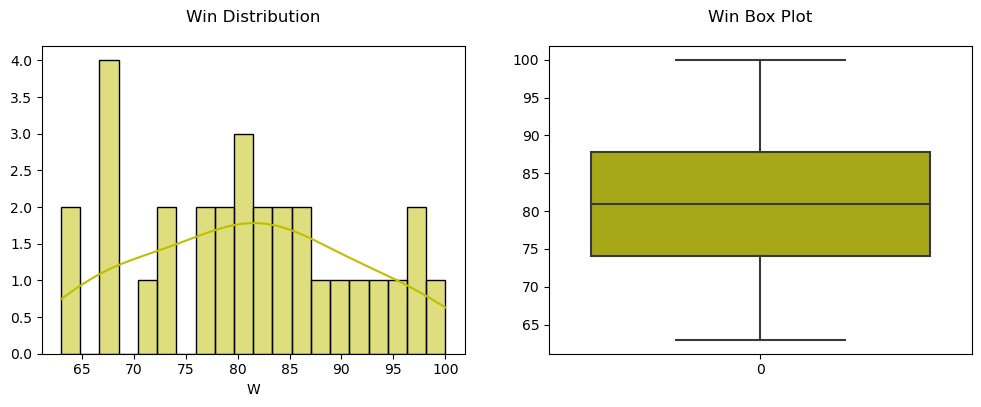

0.047088688953686085

In [17]:
#Univariate Analysis
#Visualisation of target variable distribution

fig,axes = plt.subplots(1, 2, figsize=(12, 4))

sns.histplot(df['W'], kde=True , bins=20, ax=axes[0], color='y')
sns.boxplot(df['W'], ax=axes[1], color='y')

axes[0].set_title('Win Distribution', size=12, y=1.05)
axes[0].set_ylabel('', size=10, labelpad=8)

axes[1].set_title('Win Box Plot', size=12, y=1.05)

plt.show()
df.W.skew()

Skewness of Win : 0.047088688953686085
The distribution of W is almost normal. There are not outliers present in the Box plot of W.

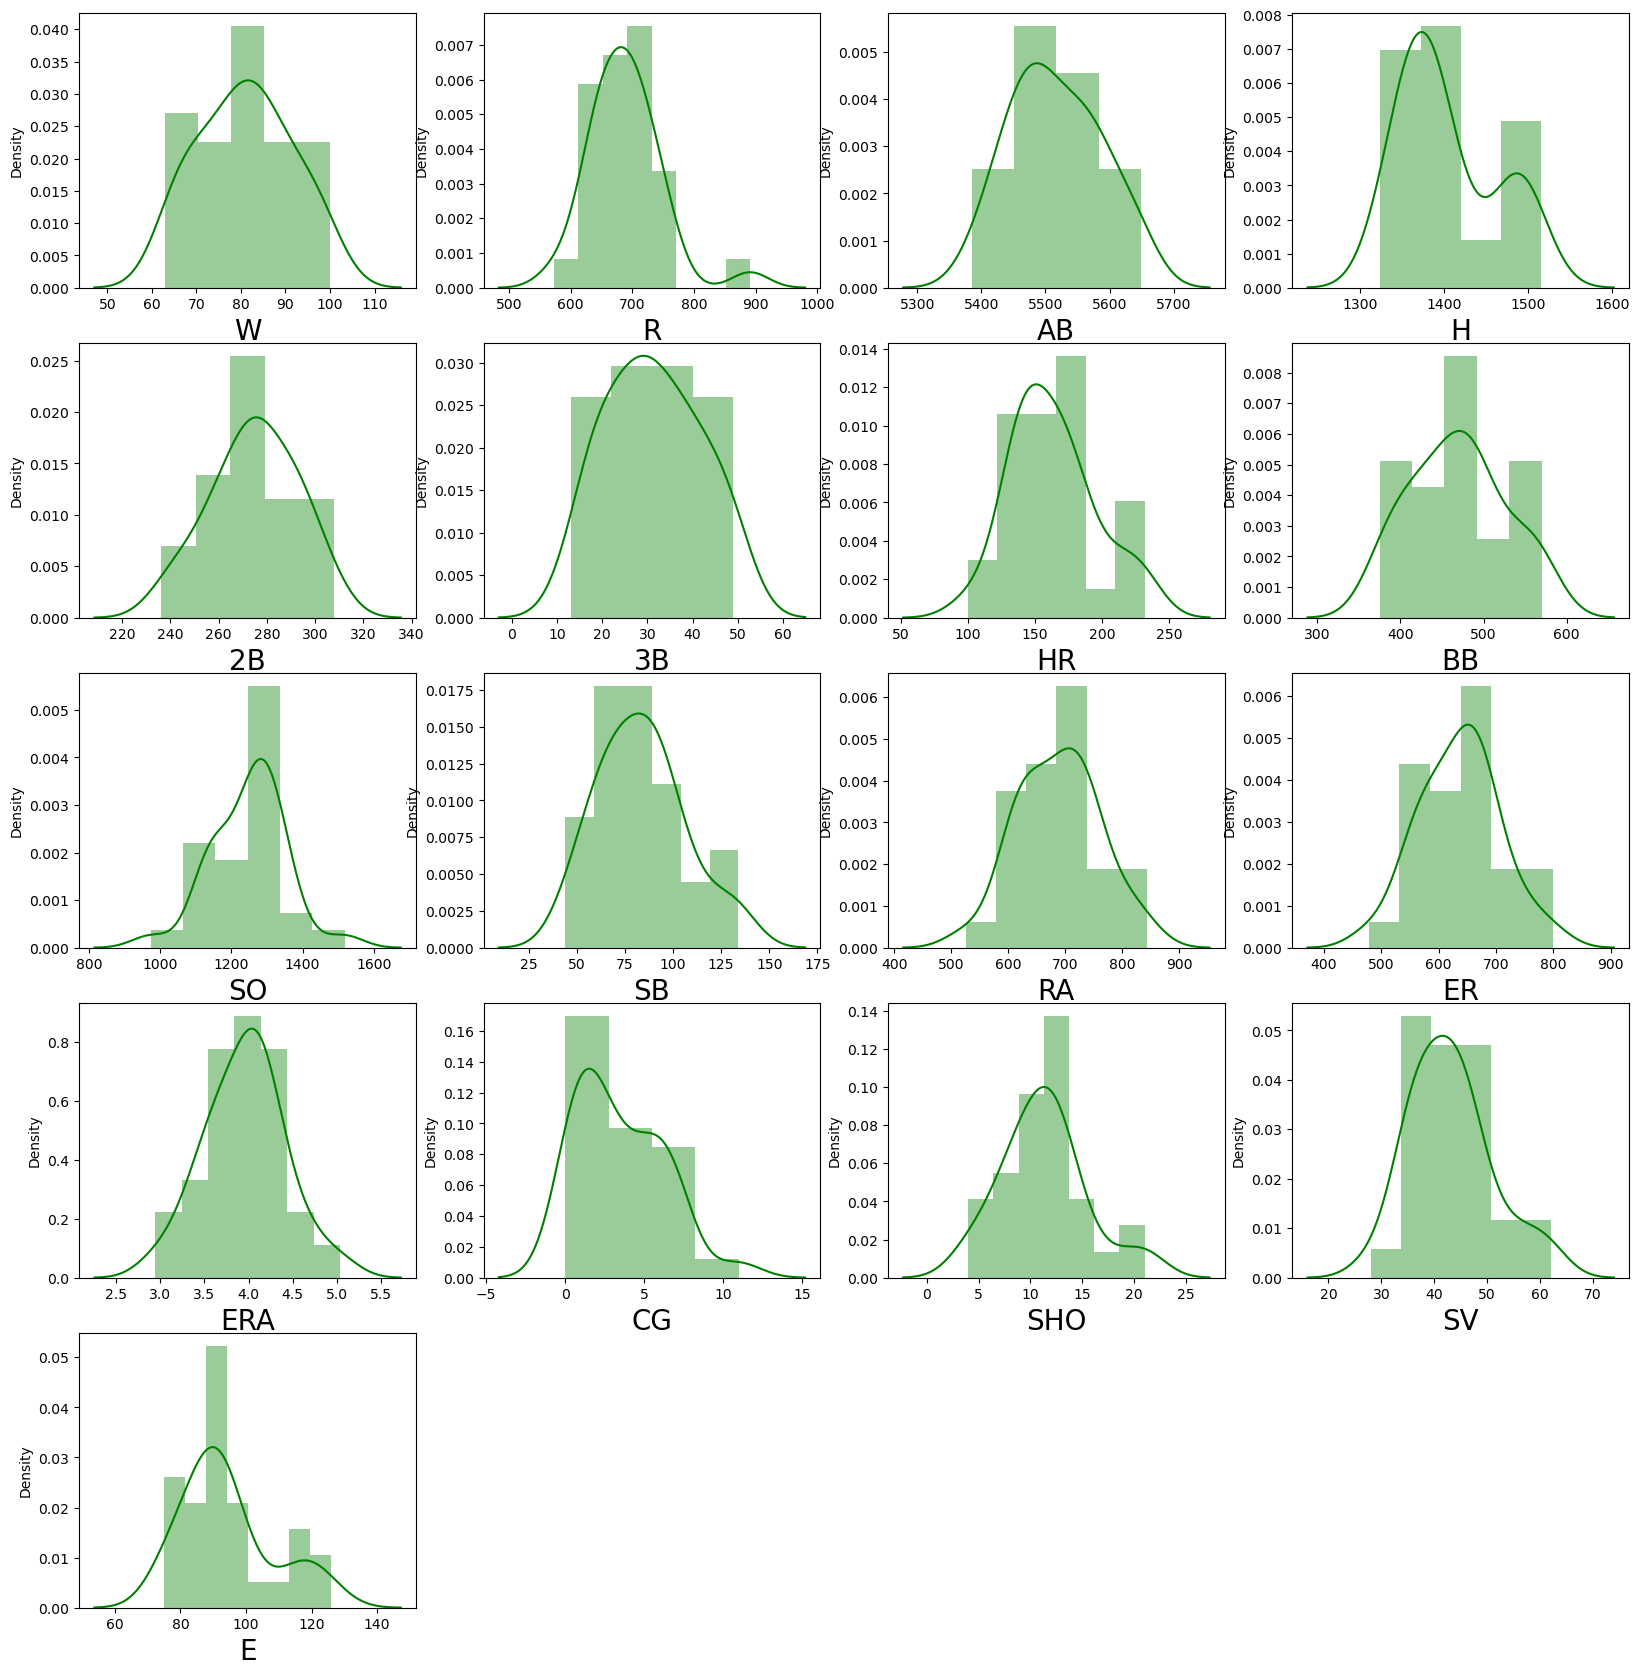

In [20]:
# Checking how the data has been distriubted in each column
plt.figure(figsize=(20,25), facecolor='white')
plotnumber = 1

for column in df:
    if plotnumber<=18:
        ax = plt.subplot(6,4,plotnumber)
        sns.distplot(df[column],color='g')
        plt.xlabel(column,fontsize=20)
    plotnumber+=1
plt.show()

From the distplot we can observe the following

The target column 'W'(wins) looks normally distributed.

The data in the feature 'R'(Runs) is not normal and the median is more than the mean so it is skewed to left.

The data in the features 'H'(Hits), 'HR'(homeruns),'SV'(saves) and 'E'(errors) are not normal and skewed to right.

'2B' also looks normal and bit skewed.

'3B' and 'SB'the data is normally distributed and there is no skewness.

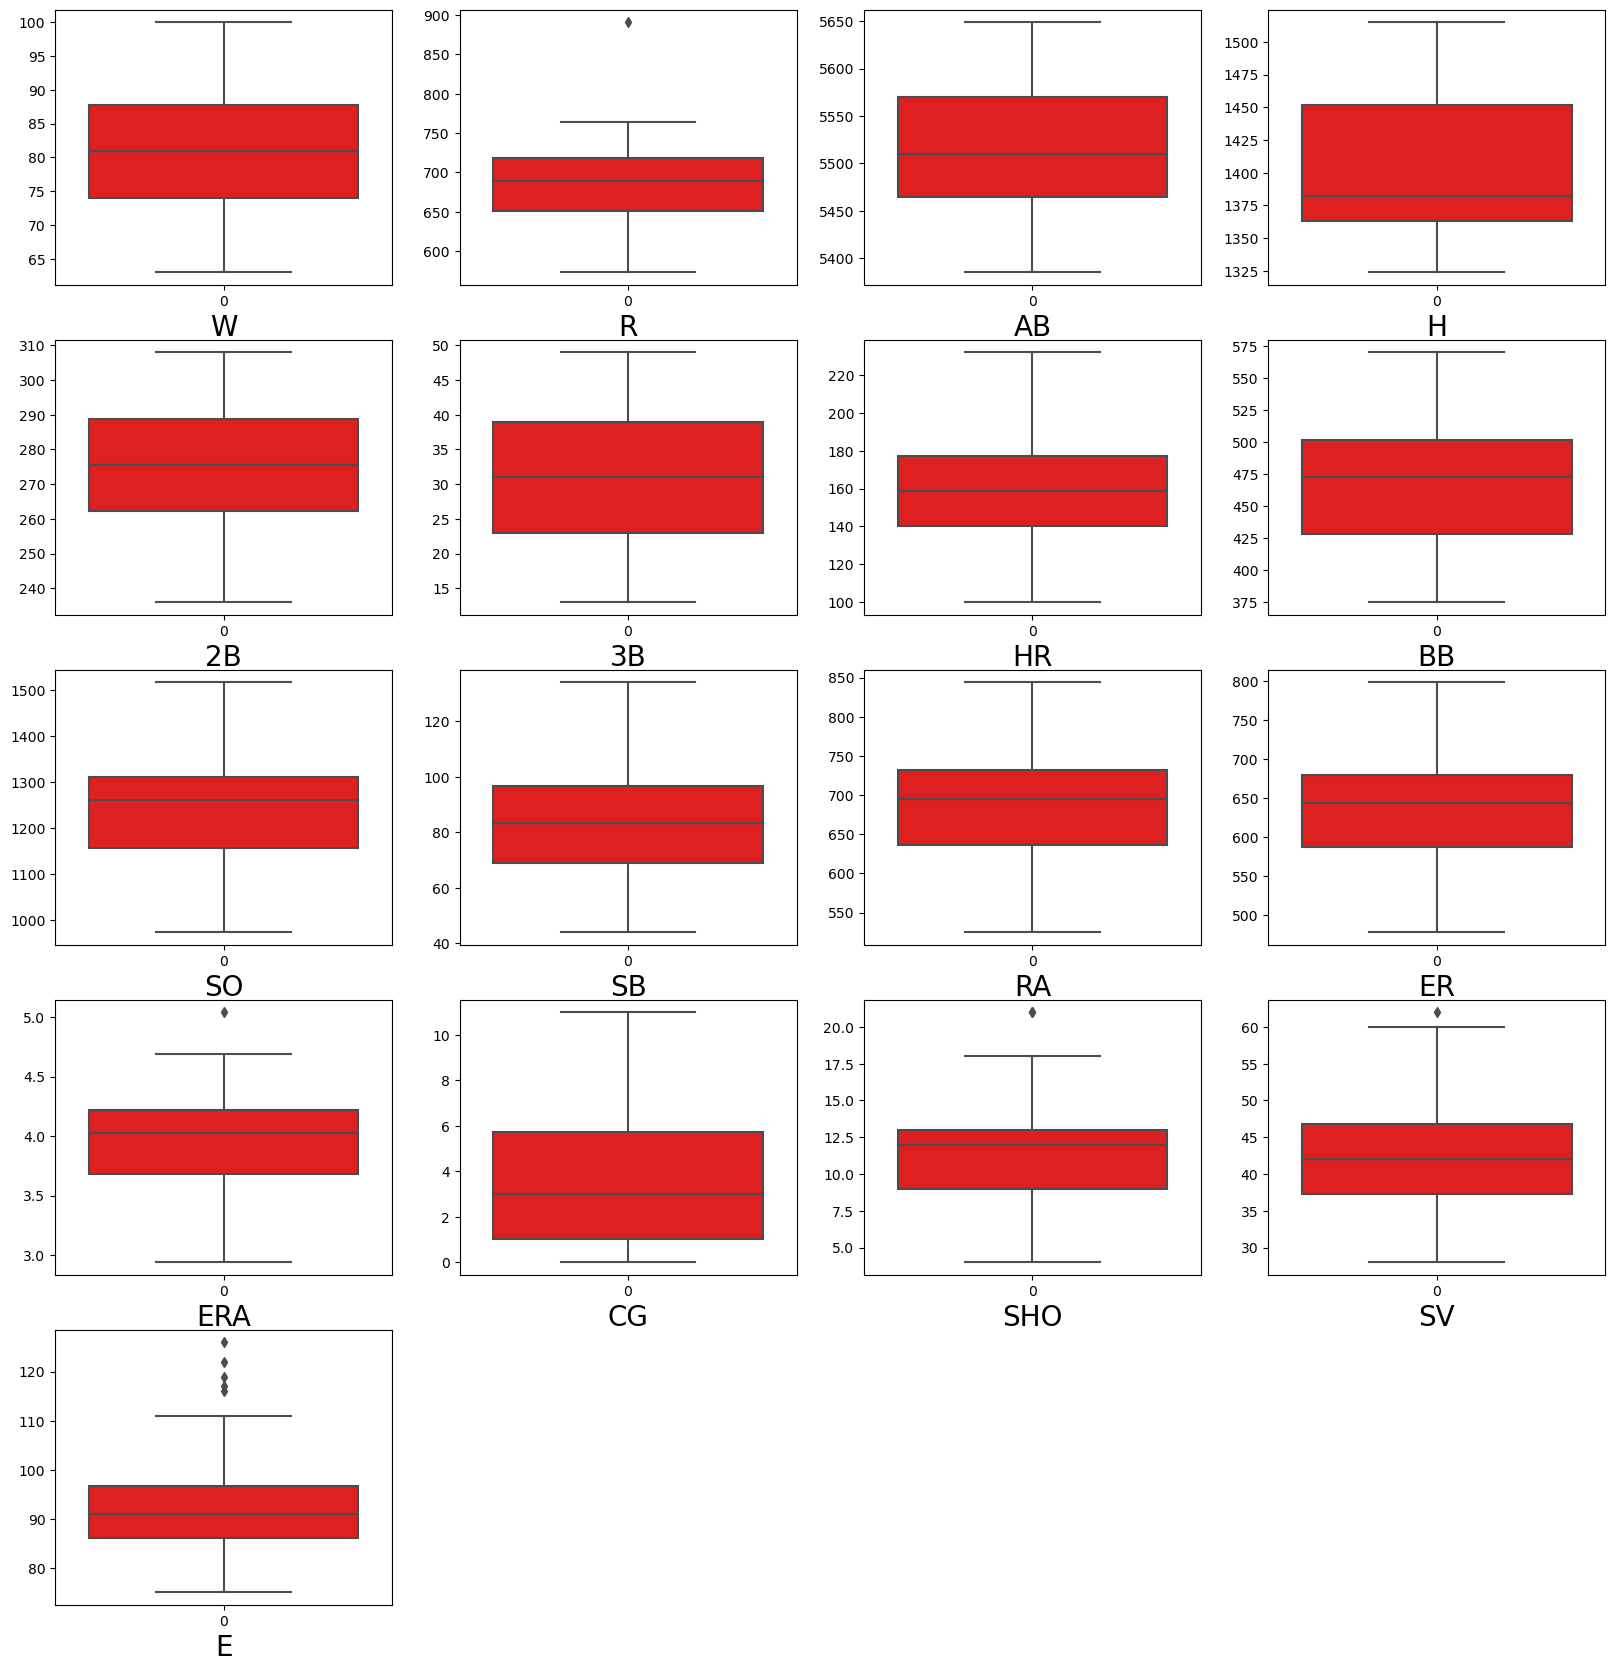

In [21]:
#Checking for outliers

plt.figure(figsize=(20,25), facecolor='white')
plotnumber = 1

for column in df:
    if plotnumber<=18:
        ax = plt.subplot(6,4,plotnumber)
        sns.boxplot(df[column],color='r')
        plt.xlabel(column,fontsize=20)
    plotnumber+=1
plt.show()

In [ ]:
By observing the boxplots we can observe the outliers are present in the columns 'R', 'ERA', 'SHO', 'SV', and 'E'.
We will remove these outliers using Zscore method.

Text(0, 0.5, 'Errors')

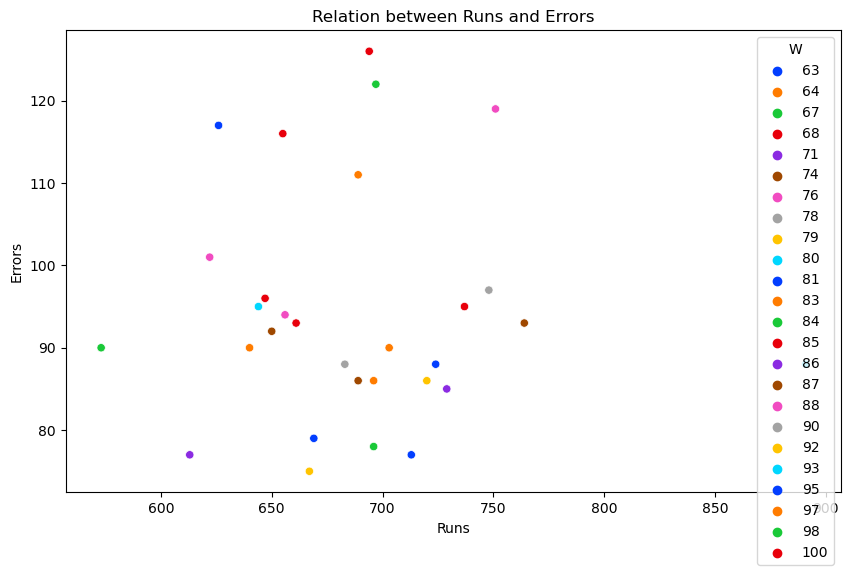

In [26]:
#Bivariate Analysis
# Checking the relation between runs and errors
plt.figure(figsize=[10,6])
plt.title('Relation between Runs and Errors')
sns.scatterplot(x=df['R'],y=df['E'],hue=df["W"],palette='bright')
plt.xlabel("Runs")
plt.ylabel("Errors")

This scatter plot gives the relation between the Runs and the Errors on the basis of Wins. 
There is no linear relationship between these columns. We can infer that there is no correlation.

Text(0, 0.5, 'Hits')

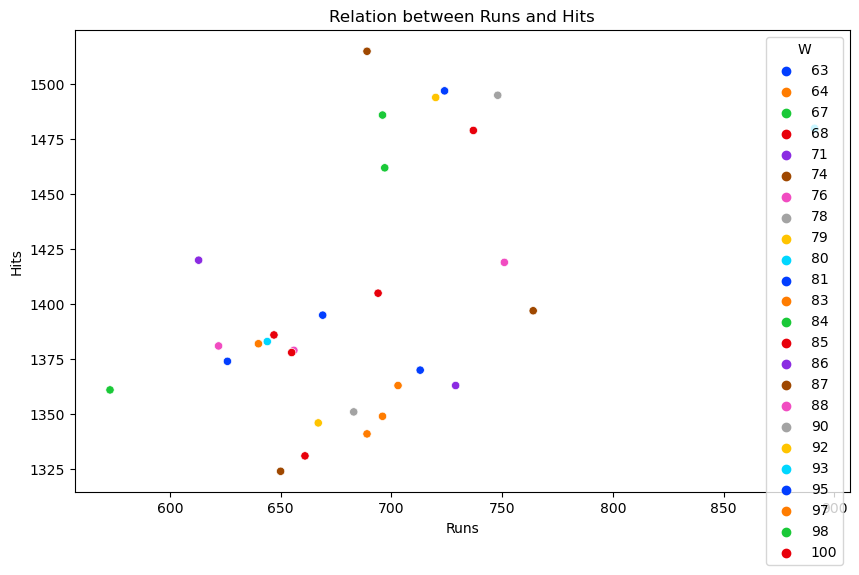

In [27]:
#Checking the corelation between runs and hits
plt.figure(figsize=(10,6))
plt.title('Relation between Runs and Hits')
sns.scatterplot(x=df['R'],y=df['H'],hue=df['W'],palette='bright');
plt.xlabel('Runs')
plt.ylabel('Hits')

As we can see that there is no linearity between the columns.

Text(0, 0.5, 'Hits')

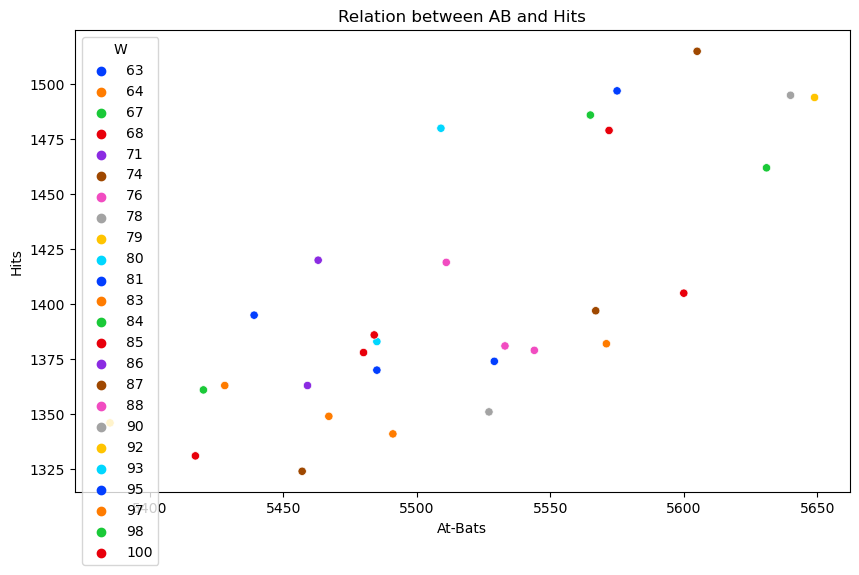

In [28]:
#Checking the relation between AB and Hits
plt.figure(figsize=(10,6))
plt.title('Relation between AB and Hits')
sns.scatterplot(x=df['AB'],y=df['H'],hue=df['W'],palette='bright');
plt.xlabel('At-Bats')
plt.ylabel('Hits')

We can observe a slight colinearity between the features, as AB increases the hits increases.


In [29]:
# Selecting the features to analyze as numerical columns
numerical_cols = ['R', 'AB', 'H', '2B', '3B', 'HR', 'BB', 'SO', 'SB', 'RA', 'ER',
       'ERA', 'SV', 'E']
len(numerical_cols)

14

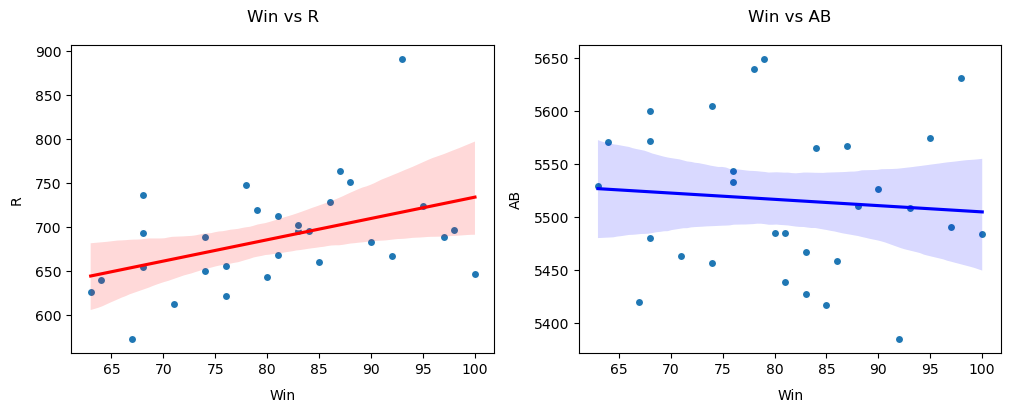

In [31]:
fig, axes = plt.subplots(1, 2, figsize=(12, 4))

# first plot
col = numerical_cols[0]
ax = sns.scatterplot(x="W", y=f"{col}", data=df, linewidth=1, ax=axes[0],palette='bright')
sns.regplot(data=df, x="W", y=f"{col}", scatter=False, ax=axes[0], color='r')

axes[0].set_xlabel('Win', size=10, labelpad=8)
axes[0].set_ylabel(f"{col}", size=10, labelpad=8)
axes[0].set_title(f"Win vs {col}", size=12, y=1.05)

#second plot
col = numerical_cols[1]
ax = sns.scatterplot(x="W", y=f"{col}", data=df, linewidth=1, ax=axes[1],palette='bright')
sns.regplot(data=df, x="W", y=f"{col}", scatter=False, ax=axes[1], color='b')

axes[1].set_xlabel('Win', size=10, labelpad=8)
axes[1].set_ylabel(f"{col}", size=10, labelpad=8)
axes[1].set_title(f"Win vs {col}", size=12, y=1.05)

plt.show()


The R feature has positive relationship with the target.
The AB feature has slightly negative relationship with the target.


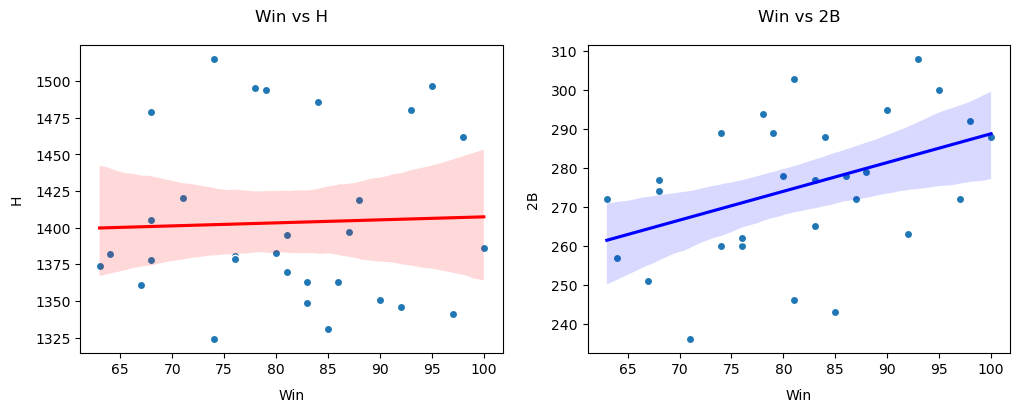

In [32]:
fig, axes = plt.subplots(1, 2, figsize=(12, 4))

#first plot
col = numerical_cols[2]
ax = sns.scatterplot(x="W", y=f"{col}", data=df, linewidth=1, ax=axes[0],palette='bright')
sns.regplot(data=df, x="W", y=f"{col}", scatter=False, ax=axes[0], color='r')

axes[0].set_xlabel('Win', size=10, labelpad=8)
axes[0].set_ylabel(f"{col}", size=10, labelpad=8)
axes[0].set_title(f"Win vs {col}", size=12, y=1.05)

#second plot
col = numerical_cols[3]
ax = sns.scatterplot(x="W", y=f"{col}", data=df, linewidth=1, ax=axes[1],palette='bright')
sns.regplot(data=df, x="W", y=f"{col}", scatter=False, ax=axes[1], color='b')

axes[1].set_xlabel('Win', size=10, labelpad=8)
axes[1].set_ylabel(f"{col}", size=10, labelpad=8)
axes[1].set_title(f"Win vs {col}", size=12, y=1.05)

plt.show()

H Feature has slight positive relationship with the target
2B feature has positive relationship with the target

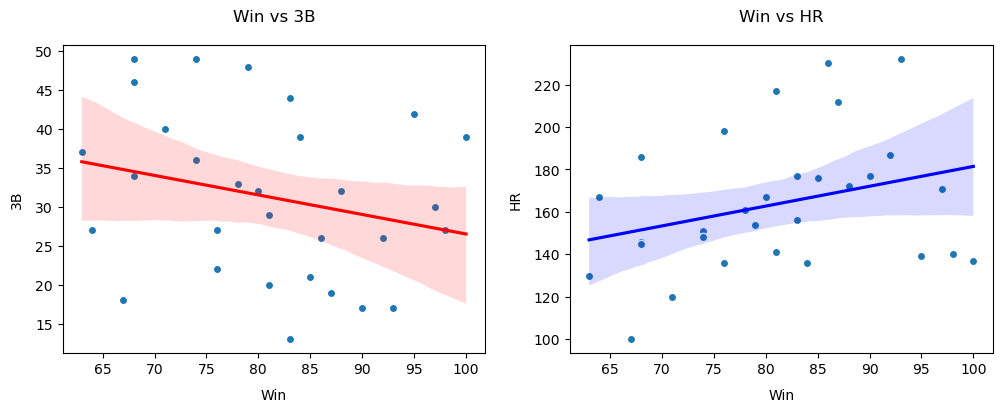

In [33]:
fig, axes = plt.subplots(1, 2, figsize=(12, 4))

#first plot
col = numerical_cols[4]
ax = sns.scatterplot(x="W", y=f"{col}", data=df, linewidth=1, ax=axes[0],palette='bright')
sns.regplot(data=df, x="W", y=f"{col}", scatter=False, ax=axes[0], color='r')

axes[0].set_xlabel('Win', size=10, labelpad=8)
axes[0].set_ylabel(f"{col}", size=10, labelpad=8)
axes[0].set_title(f"Win vs {col}", size=12, y=1.05)

#second plot
col = numerical_cols[5]
ax = sns.scatterplot(x="W", y=f"{col}", data=df, linewidth=1, ax=axes[1],palette='bright')
sns.regplot(data=df, x="W", y=f"{col}", scatter=False, ax=axes[1], color='b')

axes[1].set_xlabel('Win', size=10, labelpad=8)
axes[1].set_ylabel(f"{col}", size=10, labelpad=8)
axes[1].set_title(f"Win vs {col}", size=12, y=1.05)

plt.show()

3B has negative relationship with target
HR has positive relationship with target

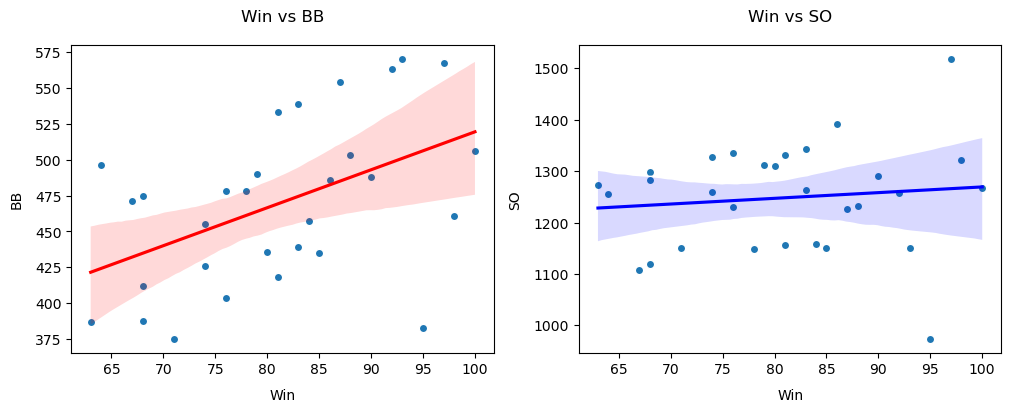

In [34]:
fig, axes = plt.subplots(1, 2, figsize=(12, 4))

#first plot
col = numerical_cols[6]
ax = sns.scatterplot(x="W", y=f"{col}", data=df, linewidth=1, ax=axes[0],palette='bright')
sns.regplot(data=df, x="W", y=f"{col}", scatter=False, ax=axes[0], color='r')

axes[0].set_xlabel('Win', size=10, labelpad=8)
axes[0].set_ylabel(f"{col}", size=10, labelpad=8)
axes[0].set_title(f"Win vs {col}", size=12, y=1.05)

#second plot
col = numerical_cols[7]
ax = sns.scatterplot(x="W", y=f"{col}", data=df, linewidth=1, ax=axes[1],palette='bright')
sns.regplot(data=df, x="W", y=f"{col}", scatter=False, ax=axes[1], color='b')

axes[1].set_xlabel('Win', size=10, labelpad=8)
axes[1].set_ylabel(f"{col}", size=10, labelpad=8)
axes[1].set_title(f"Win vs {col}", size=12, y=1.05)

plt.show()

BB has positive relationship with target
SO has slightly positively related with the target


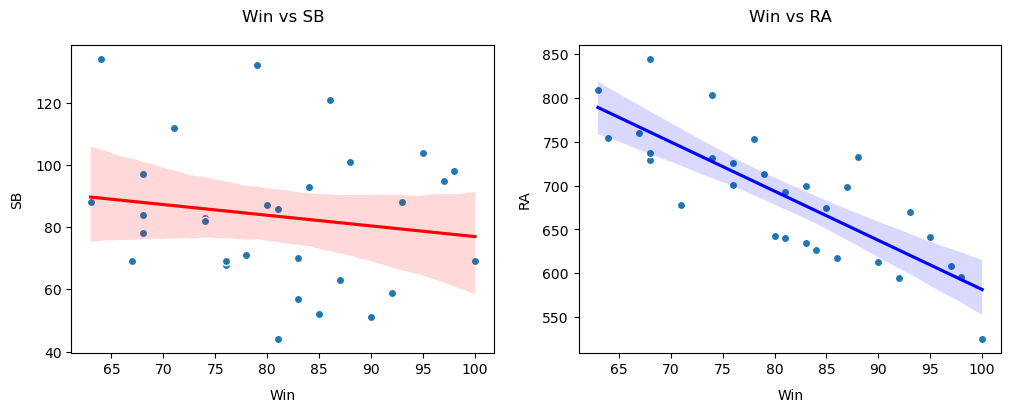

In [35]:
fig, axes = plt.subplots(1, 2, figsize=(12, 4))

#first plot
col = numerical_cols[8]
ax = sns.scatterplot(x="W", y=f"{col}", data=df, linewidth=1, ax=axes[0],palette='bright')
sns.regplot(data=df, x="W", y=f"{col}", scatter=False, ax=axes[0], color='r')

axes[0].set_xlabel('Win', size=10, labelpad=8)
axes[0].set_ylabel(f"{col}", size=10, labelpad=8)
axes[0].set_title(f"Win vs {col}", size=12, y=1.05)

#second plot
col = numerical_cols[9]
ax = sns.scatterplot(x="W", y=f"{col}", data=df, linewidth=1, ax=axes[1],palette='bright')
sns.regplot(data=df, x="W", y=f"{col}", scatter=False, ax=axes[1], color='b')

axes[1].set_xlabel('Win', size=10, labelpad=8)
axes[1].set_ylabel(f"{col}", size=10, labelpad=8)
axes[1].set_title(f"Win vs {col}", size=12, y=1.05)

plt.show()

Both SB and RA have negative relationship with the target.

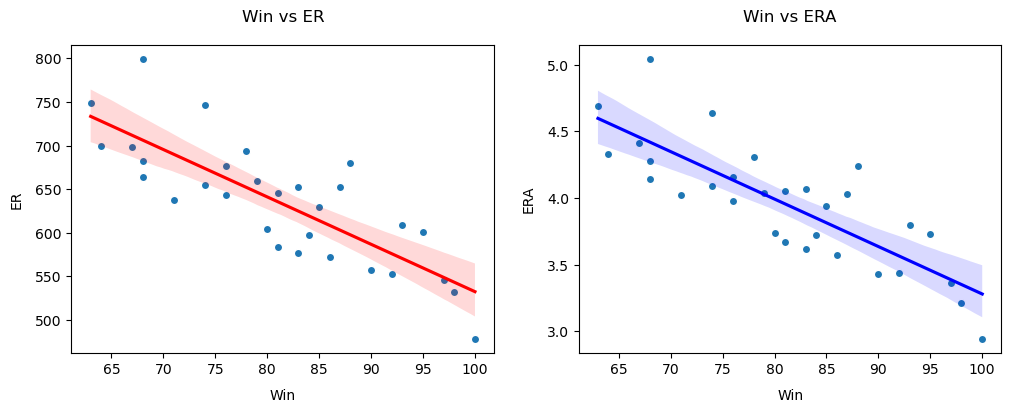

In [36]:
fig, axes = plt.subplots(1, 2, figsize=(12, 4))

#first plot
col = numerical_cols[10]
ax = sns.scatterplot(x="W", y=f"{col}", data=df, linewidth=1, ax=axes[0],palette='bright')
sns.regplot(data=df, x="W", y=f"{col}", scatter=False, ax=axes[0], color='r')

axes[0].set_xlabel('Win', size=10, labelpad=8)
axes[0].set_ylabel(f"{col}", size=10, labelpad=8)
axes[0].set_title(f"Win vs {col}", size=12, y=1.05)

# second plot
col = numerical_cols[11]
ax = sns.scatterplot(x="W", y=f"{col}", data=df, linewidth=1, ax=axes[1],palette='bright')
sns.regplot(data=df, x="W", y=f"{col}", scatter=False, ax=axes[1], color='b')

axes[1].set_xlabel('Win', size=10, labelpad=8)
axes[1].set_ylabel(f"{col}", size=10, labelpad=8)
axes[1].set_title(f"Win vs {col}", size=12, y=1.05)

plt.show()


Both ER and ERA have negative relationship with the target.

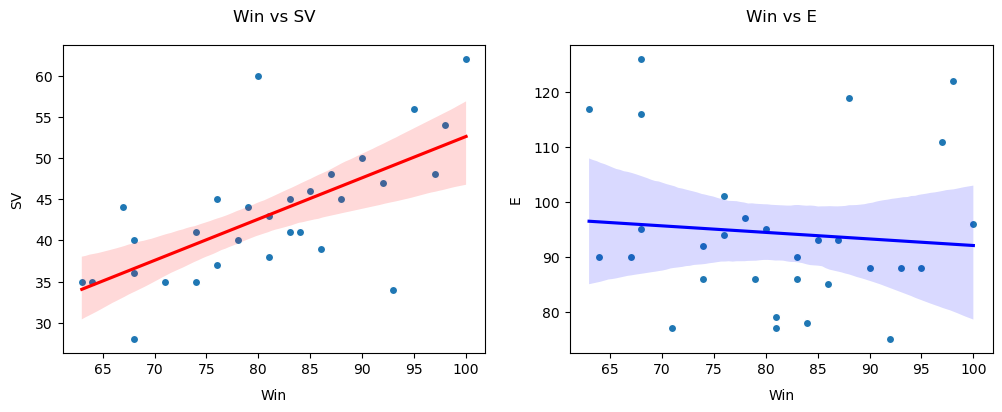

In [37]:
fig, axes = plt.subplots(1, 2, figsize=(12, 4))

#first plot
col = numerical_cols[12]
ax = sns.scatterplot(x="W", y=f"{col}", data=df, linewidth=1, ax=axes[0],palette='bright')
sns.regplot(data=df, x="W", y=f"{col}", scatter=False, ax=axes[0], color='r')

axes[0].set_xlabel('Win', size=10, labelpad=8)
axes[0].set_ylabel(f"{col}", size=10, labelpad=8)
axes[0].set_title(f"Win vs {col}", size=12, y=1.05)

#second plot
col = numerical_cols[13]
ax = sns.scatterplot(x="W", y=f"{col}", data=df, linewidth=1, ax=axes[1],palette='bright')
sns.regplot(data=df, x="W", y=f"{col}", scatter=False, ax=axes[1], color='b')

axes[1].set_xlabel('Win', size=10, labelpad=8)
axes[1].set_ylabel(f"{col}", size=10, labelpad=8)
axes[1].set_title(f"Win vs {col}", size=12, y=1.05)

plt.show()

SV has a positive relationship with target variable.
E has negative relationship with the target variable.

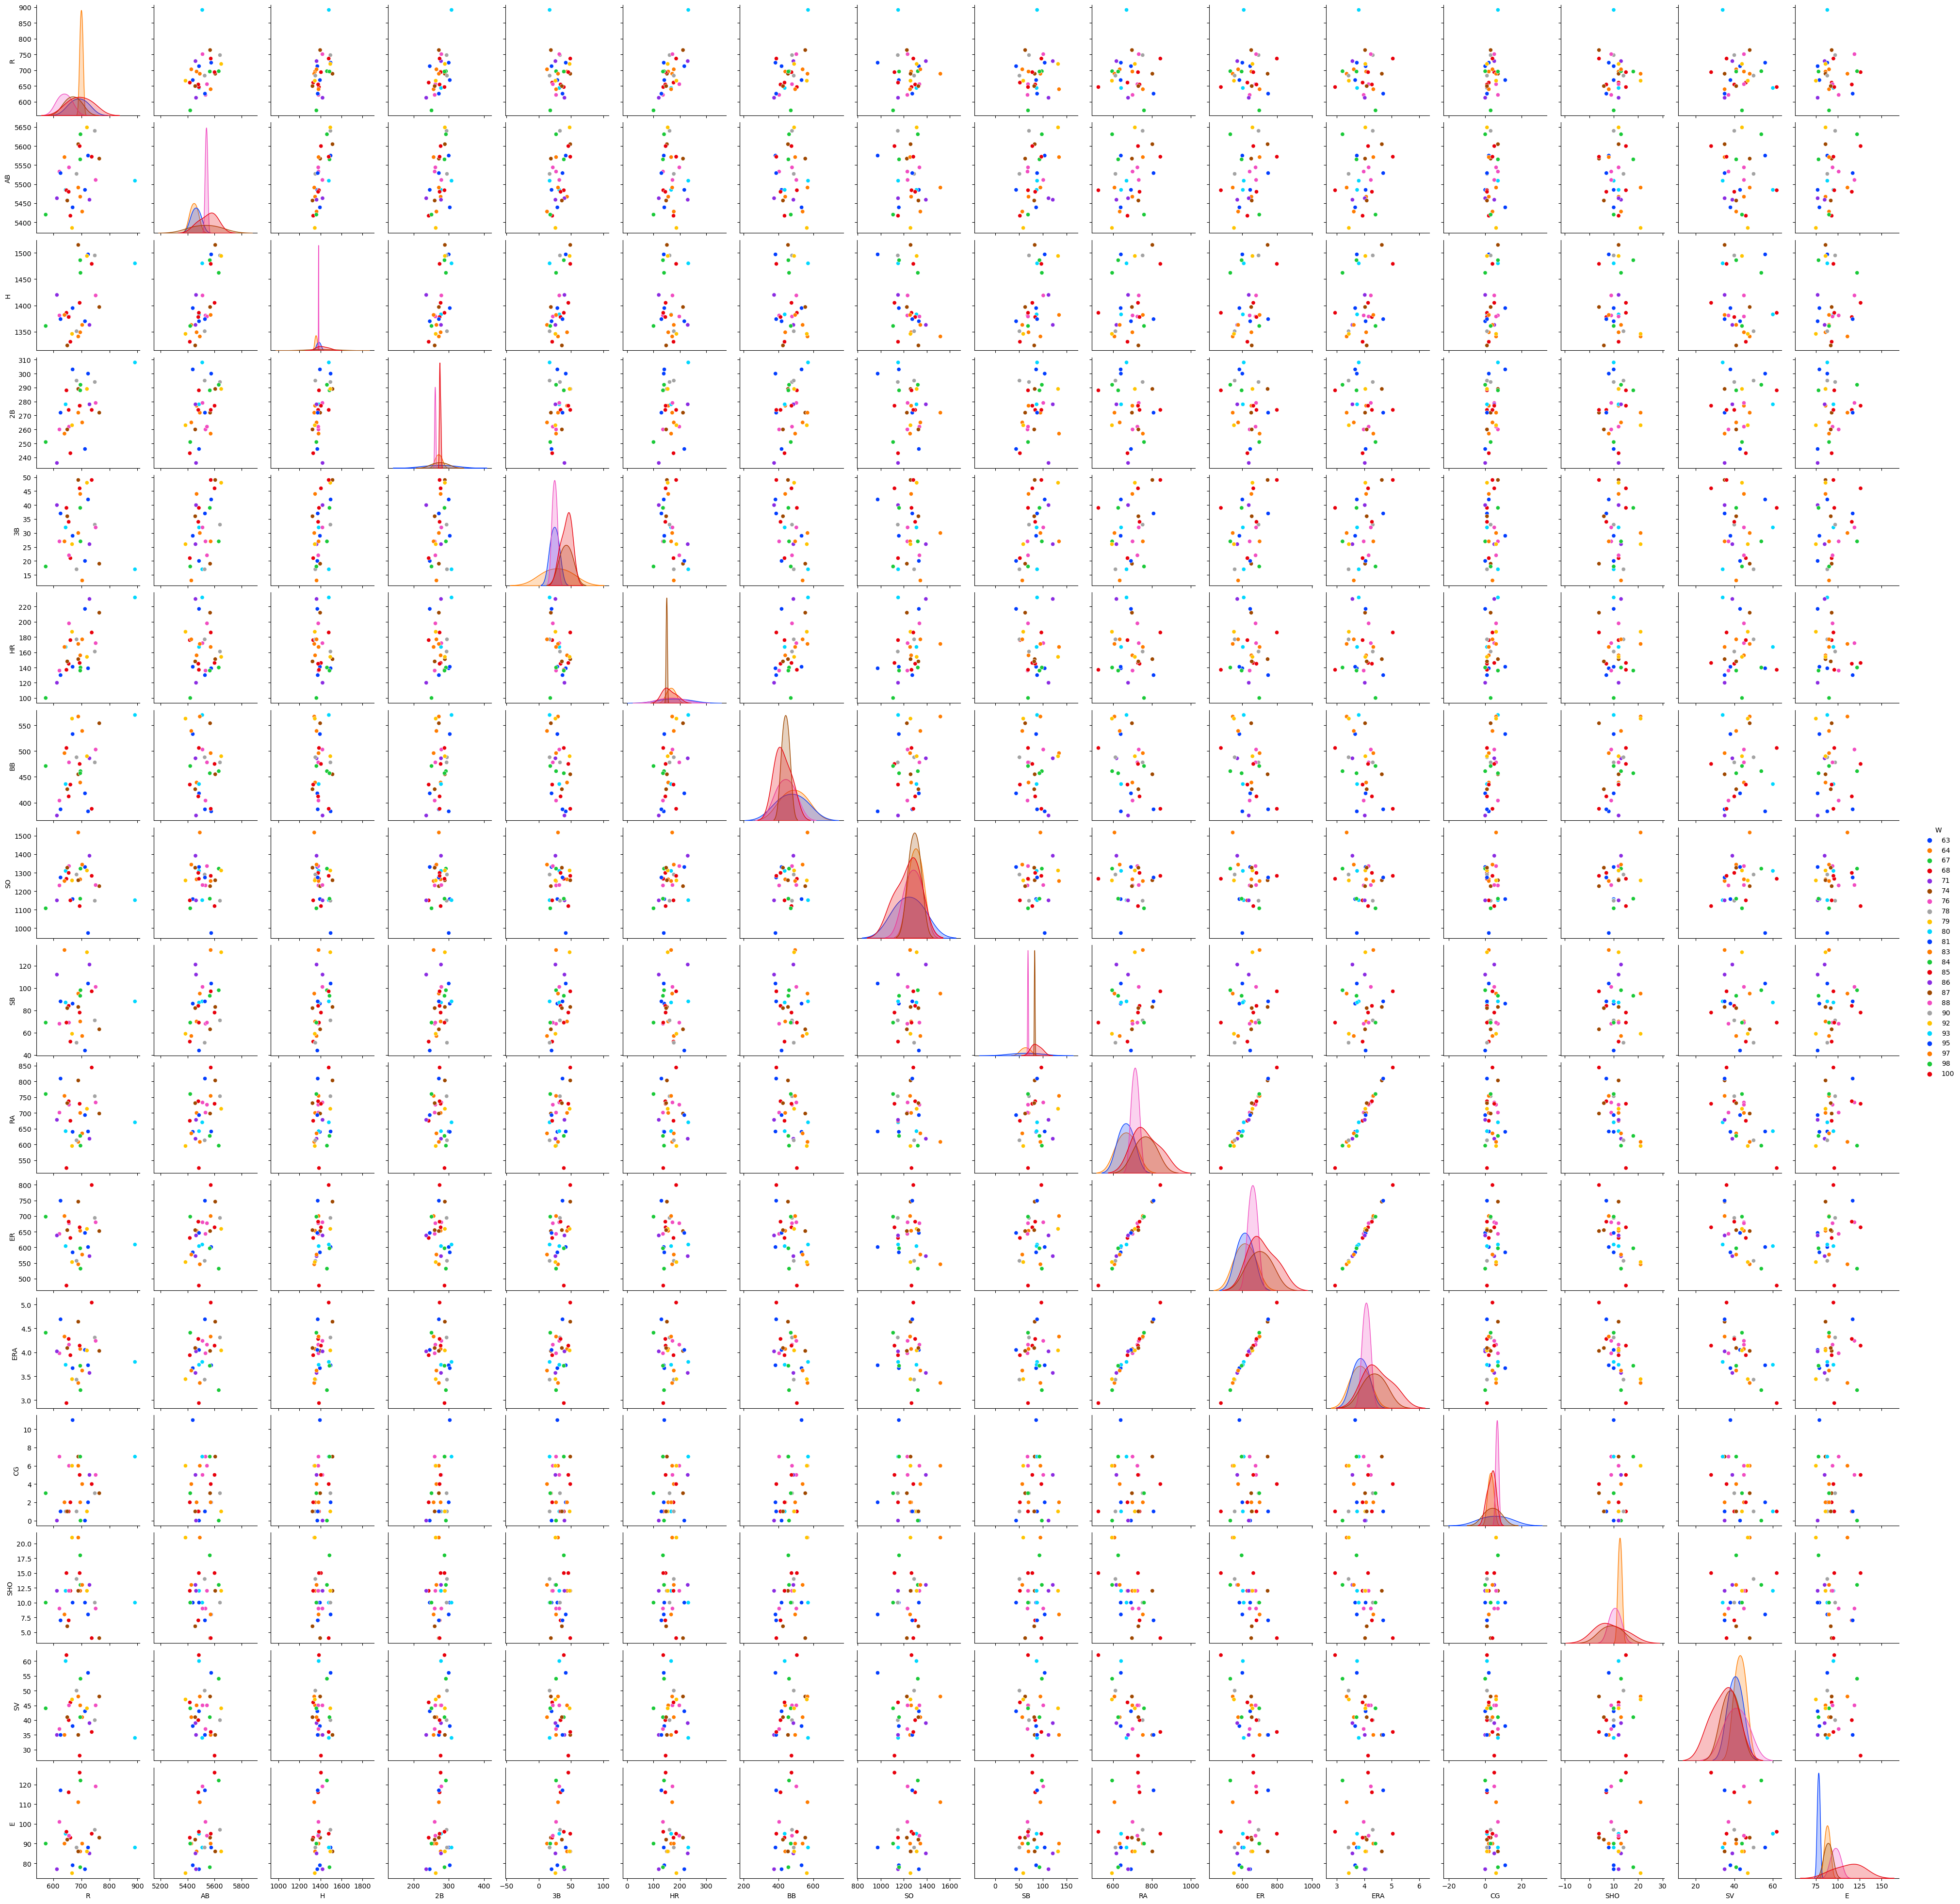

In [39]:
#Multivariate Analysis
# Checking the pairwise relation in the dataset.
sns.pairplot(df,hue="W",palette="bright")

This pair plot gives the pairwise relation between the columns which is plotted on the basis of target variable "W". 
Here we can observe the relation between the features and label.
There is strong relationship between ER, R and ERA which can be observed from the pairplot.

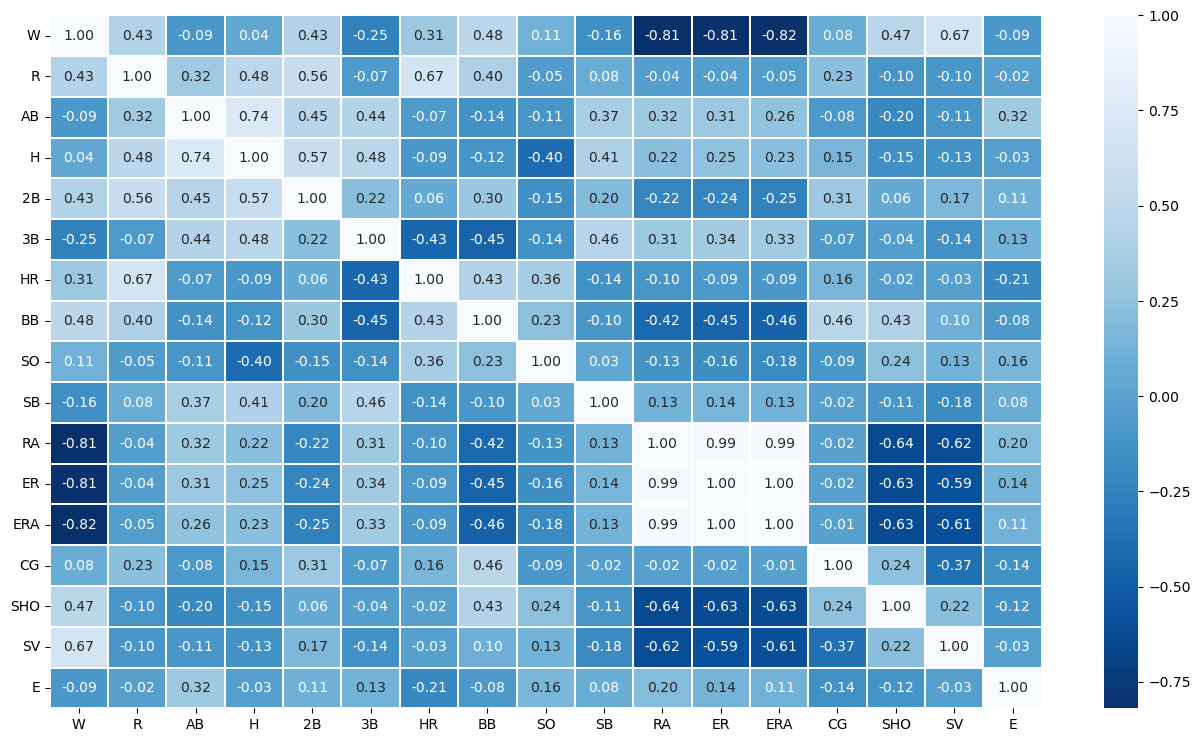

In [40]:
# Lets find out the correlation between the target variable and indepedent variable by using the heat map.
#Checking the co-relation
df.corr
# Visualizing the correlation matrix by plotting heat map.
plt.figure(figsize=(16,9))
sns.heatmap(df.corr(),linewidths=.1,fmt='0.2f', cmap="Blues_r", annot = True)
plt.yticks(rotation=0);

This heat map contains both positive and negative correlation.

The target "W" is positively correlated with the features "SV", "SHO", "BB", "HR", "2B", "R" and "SO" . 
The target "W" is highly negatively correlated with the features "ERA","ER" and "RA". 
The label "W" is also negatively correlated with the features "E", "SB", "3B" and "AB". 
Apart from this label and feature relation we can also infer that the features "ERA", "ER" and "RA" are highly positively correlated with each other. 
Which causes multicollinearity problem, to avoid this problem will check VIF value and will drop the columns
if necessary. The column "H" and "CG" has no correlation with the label, we can drop these columns.



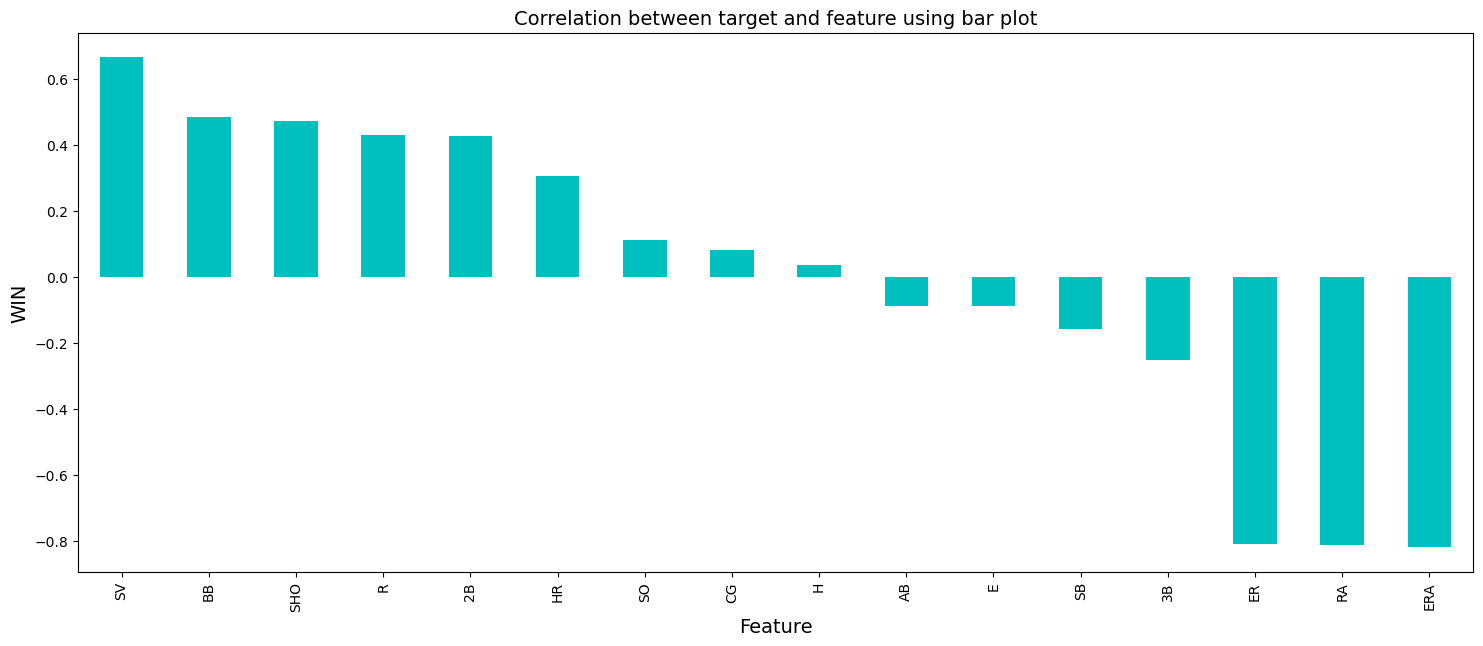

In [42]:
#Visualizing the correlation between label and features using bar plot.
plt.figure(figsize=(18,7))
df.corr()['W'].sort_values(ascending=False).drop(['W']).plot(kind='bar',color='c')
plt.xlabel('Feature',fontsize=14)
plt.ylabel('WIN',fontsize=14)
plt.title('Correlation between target and feature using bar plot',fontsize=14)
plt.show()

Now we can easily analyse the data, 
here the feature "H" and "CG" has very less correaltion with the label. Let's drop them.

In [43]:
#Data Cleaning
#Lets drop H and CG columns from the dataset
df.drop("H", axis=1, inplace=True)
df.drop("CG",axis=1, inplace=True)
df.head()

,W,R,AB,2B,3B,HR,BB,SO,SB,RA,ER,ERA,SHO,SV,E
0,95,724,5575,300,42,139,383,973,104,641,601,3.73,8,56,88
1,83,696,5467,277,44,156,439,1264,70,700,653,4.07,12,45,86
2,81,669,5439,303,29,141,533,1157,86,640,584,3.67,10,38,79
3,76,622,5533,260,27,136,404,1231,68,701,643,3.98,9,37,101
4,74,689,5605,289,49,151,455,1259,83,803,746,4.64,12,35,86


In [44]:
#Removing Outliers
#ZScore Method
df.columns

Index(['W', 'R', 'AB', '2B', '3B', 'HR', 'BB', 'SO', 'SB', 'RA', 'ER', 'ERA',
       'SHO', 'SV', 'E'],
      dtype='object')

In [45]:
# Features containing outliers
features = df[["R","ERA","SHO","SV","E"]]


In [46]:
# Using zscore to remove outliers
from scipy.stats import zscore
z=np.abs(zscore(features))
z

,R,ERA,SHO,SV,E
0,0.619078,0.506955,0.814629,1.671607,0.461470
1,0.134432,0.254598,0.172800,0.249879,0.607197
2,0.332906,0.641347,0.320914,0.654856,1.117242
3,1.146419,0.053010,0.567771,0.784104,0.485758
4,0.013270,1.531318,0.172800,1.042600,0.607197
5,3.509647,0.350165,0.320914,1.171848,0.461470
6,1.311430,0.165003,1.802057,0.637623,0.097152
7,0.428681,0.209800,0.320914,0.008617,1.262970
8,0.765626,0.484557,0.172800,2.188598,0.048576
9,1.034489,0.792164,0.320914,0.396360,0.194303


In [47]:
# Creating new dataframe
new_df = df[(z<3).all(axis=1)]
new_df

,W,R,AB,2B,3B,HR,BB,SO,SB,RA,ER,ERA,SHO,SV,E
0,95,724,5575,300,42,139,383,973,104,641,601,3.73,8,56,88
1,83,696,5467,277,44,156,439,1264,70,700,653,4.07,12,45,86
2,81,669,5439,303,29,141,533,1157,86,640,584,3.67,10,38,79
3,76,622,5533,260,27,136,404,1231,68,701,643,3.98,9,37,101
4,74,689,5605,289,49,151,455,1259,83,803,746,4.64,12,35,86
6,87,764,5567,272,19,212,554,1227,63,698,652,4.03,4,48,93
7,81,713,5485,246,20,217,418,1331,44,693,646,4.05,10,43,77
8,80,644,5485,278,32,167,436,1310,87,642,604,3.74,12,60,95
9,78,748,5640,294,33,161,478,1148,71,753,694,4.31,10,40,97
10,88,751,5511,279,32,172,503,1233,101,733,680,4.24,9,45,119


In [49]:

new_df.shape

(29, 15)

In [50]:
df.shape

(30, 15)

1 row with outlier is being deleted.
New data set has 29 rows with one being deleted.

In [51]:
# Checking the skewness
new_df.skew()


W      0.119013
R     -0.215364
AB     0.169573
2B    -0.335304
3B     0.090124
HR     0.450862
BB     0.151193
SO    -0.233815
SB     0.494966
RA     0.018155
ER     0.018461
ERA    0.016693
SHO    0.526943
SV     0.627480
E      0.840271
dtype: float64

In [59]:
scaler = PowerTransformer(method='yeo-johnson')
'''
parameters:
method = 'box-cox' or 'yeo-johnson'
'''


"\nparameters:\nmethod = 'box-cox' or 'yeo-johnson'\n"

In [60]:
skewed_features=["SHO","SV","E"]
new_df[skewed_features] = scaler.fit_transform(new_df[skewed_features].values)
new_df[skewed_features].head()

,SHO,SV,E
0,-0.787002,1.532753,-0.348265
1,0.236737,0.312020,-0.540820
2,-0.252844,-0.664137,-1.326125
3,-0.513555,-0.820689,0.650818
4,0.236737,-1.149165,-0.540820


In [61]:
#Now lets check the skewness
new_df.skew()

W      0.119013
R     -0.215364
AB     0.169573
2B    -0.335304
3B     0.090124
HR     0.450862
BB     0.151193
SO    -0.233815
SB     0.494966
RA     0.018155
ER     0.018461
ERA    0.016693
SHO    0.000529
SV    -0.000925
E      0.065585
dtype: float64

Now the skewness has been removed. 
Now lets check the distribution of data across the columns


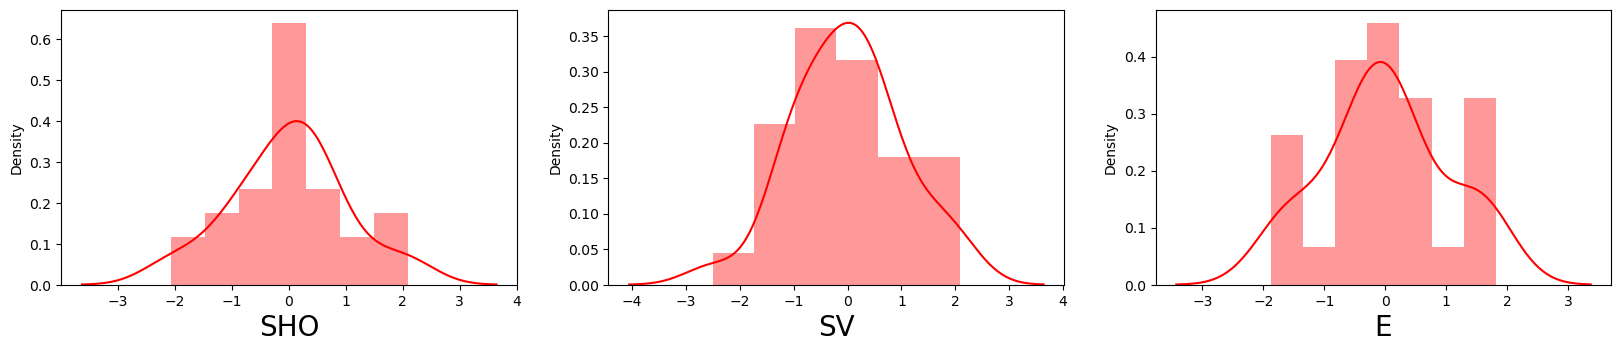

In [62]:
features_skewed = ["SHO", "SV", "E"]
plt.figure(figsize=(20,25), facecolor='white')
plotnumber = 1

for column in new_df[features_skewed]:
    if plotnumber<=18:
        ax = plt.subplot(6,3,plotnumber)
        sns.distplot(new_df[column],color='r')
        plt.xlabel(column,fontsize=20)
    plotnumber+=1
plt.show()

In [63]:
#DATA PREPROCESSING
#Separating the target and independent variable into y and x
x = new_df.drop("W", axis=1)
y = new_df['W']

print(f"Feature Dimension = {x.shape}")
print(f"Target Dimension = {y.shape}")

Feature Dimension = (29, 14)
Target Dimension = (29,)


In [64]:
#STANDARD SCALARISATION
scaler = StandardScaler()
x = pd.DataFrame(scaler.fit_transform(x), columns=x.columns)
x

,R,AB,2B,3B,HR,BB,SO,SB,RA,ER,ERA,SHO,SV,E
0,0.959398,0.830084,1.556538,1.010845,-0.765863,-1.536359,-2.727623,0.905953,-0.664514,-0.511148,-0.511388,-0.787002,1.532753,-0.348265
1,0.331147,-0.702831,0.201171,1.208917,-0.181389,-0.495021,0.121896,-0.585315,0.154638,0.232161,0.238952,0.236737,0.312020,-0.540820
2,-0.274666,-1.100253,1.733325,-0.276617,-0.697101,1.252941,-0.925866,0.116458,-0.678397,-0.754153,-0.643801,-0.252844,-0.664137,-1.326125
3,-1.329231,0.233951,-0.800621,-0.474688,-0.869006,-1.145857,-0.201246,-0.673037,0.168522,0.089217,0.040333,-0.513555,-0.820689,0.650818
4,0.174084,1.255894,0.908319,1.704094,-0.353293,-0.197495,0.072935,-0.015124,1.584683,1.561540,1.496876,0.236737,-1.149165,-0.540820
5,1.856900,0.716535,-0.093474,-1.266972,1.743939,1.643442,-0.240414,-0.892341,0.126870,0.217866,0.150677,-2.064039,0.677176,0.082858
6,0.712585,-0.447345,-1.625627,-1.167936,1.915843,-0.885522,0.777970,-1.725697,0.057451,0.132100,0.194815,-0.252844,0.052325,-1.588197
7,-0.835605,-0.447345,0.260100,0.020490,0.196801,-0.550807,0.572335,0.160319,-0.650630,-0.468265,-0.489319,0.236737,1.908137,0.237592
8,1.497899,1.752672,1.202964,0.119526,-0.009484,0.230197,-1.013995,-0.541454,0.890486,0.818231,0.768604,-0.252844,-0.365006,0.383386
9,1.565212,-0.078310,0.319029,0.020490,0.368705,0.695081,-0.181661,0.774370,0.612808,0.618110,0.614123,-0.513555,0.312020,1.554265


In [65]:
#Checking Variance Inflation Factor solve multicolinearity
# Finding varience inflation factor in each scaled column i.e, x.shape[1] (1/(1-R2))


vif = pd.DataFrame()
vif["VIF values"] = [variance_inflation_factor(x.values,i)
              for i in range(len(x.columns))]
vif["Features"] = x.columns

# Let's check the values
vif

,VIF values,Features
0,6.219825,R
1,9.828077,AB
2,2.683572,2B
3,3.196853,3B
4,7.369072,HR
5,2.686472,BB
6,2.741072,SO
7,1.757901,SB
8,179.096825,RA
9,1754.643859,ER


The VIF value is more than 10 in the columns "AB", "RA", "ER", "ERA".
Let's drop these one by one. First drop the colummn having highest VIF value that is "ER".

In [66]:
x.drop("ER", axis=1, inplace=True)

In [67]:
vif = pd.DataFrame()
vif["VIF values"] = [variance_inflation_factor(x.values,i)
              for i in range(len(x.columns))]
vif["Features"] = x.columns

# Let's check the values
vif

,VIF values,Features
0,4.352902,R
1,3.177214,AB
2,2.597985,2B
3,3.072775,3B
4,4.949255,HR
5,2.561982,BB
6,2.661842,SO
7,1.680467,SB
8,119.939744,RA
9,111.859162,ERA


Again the multicolinearity issue exists , so lets see if we drop RA the issue is being addressed.


In [68]:
x.drop("RA", axis=1, inplace=True)

In [69]:
vif = pd.DataFrame()
vif["VIF values"] = [variance_inflation_factor(x.values,i)
              for i in range(len(x.columns))]
vif["Features"] = x.columns

# Let's check the values
vif

,VIF values,Features
0,4.250076,R
1,2.238746,AB
2,2.597917,2B
3,3.030073,3B
4,4.562014,HR
5,2.222720,BB
6,2.042786,SO
7,1.568151,SB
8,3.878177,ERA
9,2.651314,SHO


After removing RA, the VIF values are less than 5, that means there is no multicollinearity. 
We can go ahead with fitting our data to the model. Lets go ahead with train test split.


In [70]:
#Finding the best random state
def find_best_random_state(model, x, y):
    best_acc = 0
    best_random_state = 0

    for i in range(1,200):
        x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=i)
        model.fit(x_train, y_train)
        y_pred = model.predict(x_test)
        # Adapt to Regression Models
        acc = r2_score(y_test, y_pred)
        if acc > best_acc:
            best_acc = acc
            best_random_state = i
            
    return [best_random_state, best_acc]


# Build the model
model = LinearRegression()
random_state, acc = find_best_random_state(model, x, y) 
print(f"Maximum r2 score is {acc} at random_state {random_state}")

Maximum r2 score is 0.9291790579976076 at random_state 50


We got the maximum R2 score as 93% on the random state 50.

In [71]:
#creating Train Test Split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=random_state)

In [87]:
#Linear Regression
# Checking r2score for Linear Regression
LR = LinearRegression()
LR.fit(x_train,y_train)

# prediction
predLR=LR.predict(x_test)
print('R2_score:',r2_score(y_test,predLR))

# Mean Absolute Error (MAE)
print('MAE:',metrics.mean_absolute_error(y_test, predLR))

# Mean Squared Error (MSE)
print('MSE:',metrics.mean_squared_error(y_test, predLR))

# Root Mean Squared Error (RMSE)
print("RMSE:",np.sqrt(metrics.mean_squared_error(y_test, predLR)))

#Cross Validation Score
print("CV Score:",cross_val_score(LR,x,y,cv=5).mean())

R2_score: 0.9291790579976076
MAE: 2.4627865987898456
MSE: 10.163242343651971
RMSE: 3.187984056367279
CV Score: 0.3734441230489941


The R2 Score for Linear Regression model is 93% and CV Score is 0.37

In [77]:
#LINEAR REGRESSION WITH RIDGE
paramsRidge = {'alpha':[0.01, 0.1, 1.0,10.0], 'solver' : ['auto', 'svd', 'lsqr', 'sparse_cg', 'sag', 'saga']}
ridge=Ridge()
clf=GridSearchCV(ridge,paramsRidge)
clf.fit(x_train,y_train)
print(clf.best_params_)

{'alpha': 10.0, 'solver': 'sag'}


In [85]:
# Checking R2 score for Ridge regressor
ridge=Ridge(alpha=10.0,solver='sag')
ridge.fit(x_train,y_train)
ridge.score(x_train,y_train)
pred_ridge=ridge.predict(x_test)
print('R2_Score:',r2_score(y_test,pred_ridge))
print('MAE:',metrics.mean_absolute_error(y_test, pred_ridge))
print('MSE:',metrics.mean_squared_error(y_test, pred_ridge))
print("RMSE:",np.sqrt(metrics.mean_squared_error(y_test, pred_ridge)))
print("CV Score:",cross_val_score(ridge,x,y,cv=5).mean())


R2_Score: 0.8257572764022052
MAE: 4.345051582725201
MSE: 25.004906408651436
RMSE: 5.00049061679466
CV Score: 0.35147601693738173


The R2 Score for Ridge Regressor is 83% and CV score is 0.35

In [79]:
#Linear Regression with LASSO
parameters={'alpha':[0.0001,0.001,0.01,0.1,1,10],'random_state':list(range(0,100))}
lasso=Lasso()
clf=GridSearchCV(lasso,parameters)
clf.fit(x_train,y_train)
print(clf.best_params_)

{'alpha': 1, 'random_state': 0}


In [84]:
lasso=Lasso(alpha=1,random_state=0)
lasso.fit(x_train,y_train)
lasso.score(x_train,y_train)
pred_lasso=lasso.predict(x_test)
print('R2_Score:',r2_score(y_test,pred_lasso))
print('MAE:',metrics.mean_absolute_error(y_test, pred_lasso))
print('MSE:',metrics.mean_squared_error(y_test, pred_lasso))
print("RMSE:",np.sqrt(metrics.mean_squared_error(y_test, pred_lasso)))
print("CV Score:",cross_val_score(lasso,x,y,cv=5).mean())

R2_Score: 0.8642951302468398
MAE: 3.8253497504300955
MSE: 19.474486493959677
RMSE: 4.412990651922988
CV Score: 0.5206537019436116


The R2 Score for Lasso Regressor is 86% and CV score is 0.52

In [88]:
#RANDOM FOREST REGRESSOR
# Checking R2 score for  Random Forest Regressor
RFR=RandomForestRegressor()
RFR.fit(x_train,y_train)

# prediction
pred_RFR=RFR.predict(x_test)
print('R2_Score:',r2_score(y_test,pred_RFR))

# Mean Absolute Error (MAE)
print('MAE:',metrics.mean_absolute_error(y_test, pred_RFR))

# Mean Squared Error (MSE)
print('MSE:',metrics.mean_squared_error(y_test, pred_RFR))

# Root Mean Squared Error (RMSE)
print("RMSE:",np.sqrt(metrics.mean_squared_error(y_test, pred_RFR)))

# Checking cv score for Random Forest Regression
print("CV Score",cross_val_score(RFR,x,y,cv=5).mean())

R2_Score: 0.6190898657949072
MAE: 6.373333333333331
MSE: 54.662955555555534
RMSE: 7.393440035298558
CV Score -0.5224524518406877


The R2 Score for Random forest regressor is 66% and CV Score is -0.52

In [89]:
#GRADIENT BOOSTING REGRESSOR
# Checking R2 score for  GradientBoosting Regressor
from sklearn.ensemble import GradientBoostingRegressor
GB=GradientBoostingRegressor()
GB.fit(x_train,y_train)

# prediction
predGB=GB.predict(x_test)
print('R2_Score:',metrics.r2_score(y_test,predGB))
print('MAE:',metrics.mean_absolute_error(y_test, predGB))
print('MSE:',metrics.mean_squared_error(y_test, predGB))
print("RMSE:",np.sqrt(metrics.mean_squared_error(y_test, predGB)))

# Checking cv score for GradientBoosting Regressor
print("CV Score:",cross_val_score(GB,x,y,cv=5).mean())

R2_Score: 0.5197580986713524
MAE: 6.443071720010918
MSE: 68.91767729684197
RMSE: 8.30166713960768
CV Score: -1.1893324242164354


The R2 Score for Gradient Boosting Regressor is 43% and Cv Score is -1.19.


In [90]:
# Checking R2 score for Stochastic Gradient Descent Regressor
SGD=SGDRegressor()
SGD.fit(x_train,y_train)

# prediction
predSGD=SGD.predict(x_test)
print('R2_Score:',r2_score(y_test,predSGD))
print('MAE:',metrics.mean_absolute_error(y_test, predSGD))
print('MSE:',metrics.mean_squared_error(y_test, predSGD))
print("RMSE:",np.sqrt(metrics.mean_squared_error(y_test, predSGD)))

# Checking cv score for Stochastic Gradient Descent Regressor
print("CV Score:",cross_val_score(SGD,x,y,cv=5).mean())

R2_Score: 0.930035592941106
MAE: 2.74483318350708
MSE: 10.040324292007194
RMSE: 3.1686470759627356
CV Score: 0.2614295279714736


The R2 Score for Stochastic Gradient Descent Regressor is 93% and CV score is 0.3


From the above model results summary, we can conclude that Lasso Regression model suits this project with 
a R2 Score of 86% and Cross Validation score of 0.52, so we conclude Lasso is our best performing model.

In [91]:
#HYPERPARAMETER TUNING
#Find the best parameters for Lasso
random_state

50

In [92]:
model=Lasso()
model.get_params()

{'alpha': 1.0,
 'copy_X': True,
 'fit_intercept': True,
 'max_iter': 1000,
 'positive': False,
 'precompute': False,
 'random_state': None,
 'selection': 'cyclic',
 'tol': 0.0001,
 'warm_start': False}

In [93]:
# Lasso Regression
param_grid = {'alpha': [1.0,.05,2,10], 
              'fit_intercept':[True, False], 
              'max_iter': [10, 30, 1000],
              'positive': [False,True],
              'random_state': [1,10,20,random_state],
              'selection':['cyclic','random'],
              'tol': [0.0001, 0.00001, 0.000001]}

In [94]:
GCV=GridSearchCV(model,param_grid,cv=5)
GCV.fit(x_train,y_train)

GridSearchCV(cv=5, estimator=Lasso(),
             param_grid={'alpha': [1.0, 0.05, 2, 10],
                         'fit_intercept': [True, False],
                         'max_iter': [10, 30, 1000], 'positive': [False, True],
                         'random_state': [1, 10, 20, 50],
                         'selection': ['cyclic', 'random'],
                         'tol': [0.0001, 1e-05, 1e-06]})

In [101]:
GCV.best_params_
GCV.best_estimator_

Lasso(max_iter=10, random_state=20, selection='random')

In [105]:
# Creating final model
Best_Model = Lasso(alpha=1.0, fit_intercept=True, max_iter=10,random_state=20,selection="random", tol=0.0001)
Best_Model.fit(x_train,y_train)
pred = Best_Model.predict(x_test)
print('R2_Score:',r2_score(y_test,pred_lasso)*100)
print("RMSE value:",np.sqrt(metrics.mean_squared_error(y_test, pred_lasso)))


R2_Score: 86.42951302468398
RMSE value: 4.412990651922988


After tuning, the final R2 Score is 86%.

In [106]:
# Saving the model using .pkl
import joblib
joblib.dump(Best_Model,"BaseBall_Case_Study.pkl")

['BaseBall_Case_Study.pkl']

In [107]:
# Let's load the saved model and get the prediction

# Loading the saved model
Loaded_model=joblib.load("BaseBall_Case_Study.pkl")

#Prediction
prediction = Loaded_model.predict(x_test)
prediction

array([69.18721027, 79.6867364 , 76.82941407, 82.51665226, 74.60342643,
       71.00120777, 87.2368957 , 89.24242077, 95.87832954])

In [108]:
pd.DataFrame([Loaded_model.predict(x_test)[:],y_test[:]],index=["Predicted","Original"])

,0,1,2,3,4,5,6,7,8
Predicted,69.18721,79.686736,76.829414,82.516652,74.603426,71.001208,87.236896,89.242421,95.87833
Original,68.00000,78.000000,74.000000,88.000000,68.000000,64.000000,92.000000,90.000000,100.00000


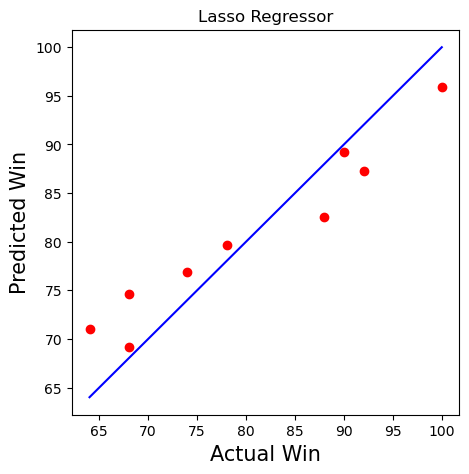

In [109]:
#Lets see the Visual Representation of Actual Win Vs Predicted Win
plt.figure(figsize=(5,5))
plt.scatter(y_test,prediction, c='r')
plt1 = max(max(prediction), max(y_test))
plt2 = min(min(prediction), min(y_test))
plt.plot([plt1, plt2], [plt1, plt2], 'b-')
plt.xlabel('Actual Win', fontsize=15)
plt.ylabel('Predicted Win', fontsize=15)
plt.title("Lasso Regressor")
plt.show()

In [ ]:
We conclude the baseball case study with Lasso model.